# PCA y clustering con k-means.

1. A partir de la base de datos Iris, con sus cuatro características, obtenga las dos primeras componentes principales. Representa gráficamente los puntos de datos a partir de las dos componentes principales obtenidas. Puesto que estamos realizando aprendizaje no supervisado , no hace falta que tenga en cuenta las etiquetas de clase.

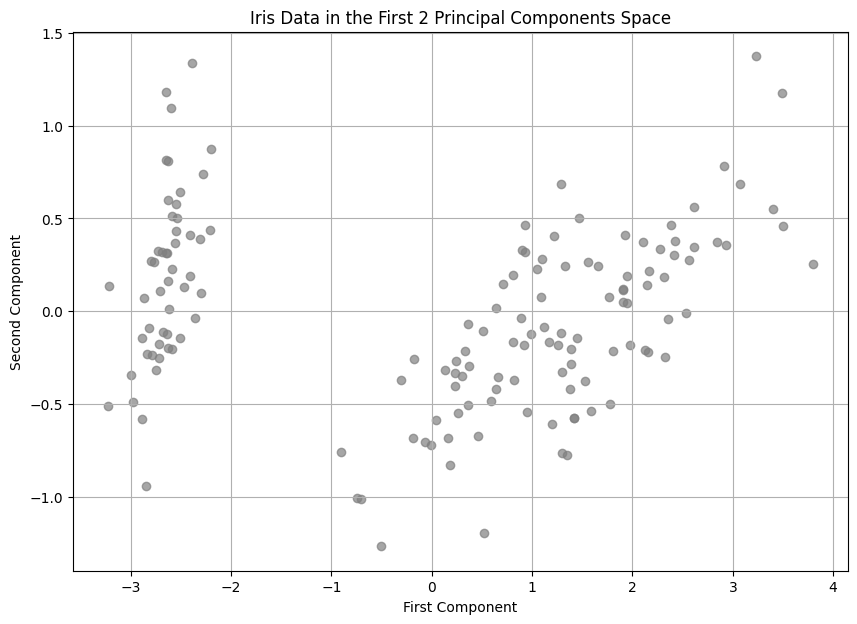

In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data 

pca = PCA(n_components=2) # 2 components
X_pca = pca.fit_transform(X)

variables = ['component_1', 'component_2']
df_pca = pd.DataFrame(X_pca, columns=variables)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['component_1'], df_pca['component_2'], c='gray', alpha=0.7)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Iris Data in the First 2 Principal Components Space')
plt.grid()
plt.show()

2. Distribuya los datos en tres clústeres. Represéntalas ahora con colores que indiquen el clúster al que pertenecen.

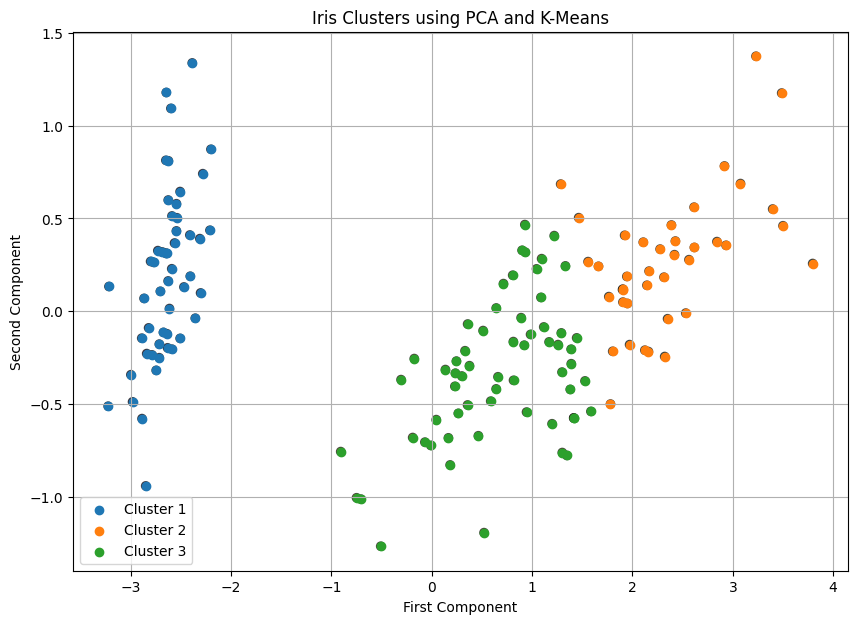

In [23]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['component_1'], df_pca['component_2'], c=df_pca['Cluster'], edgecolors='black', cmap='viridis', alpha=0.7)
for cluster in range(3):
	plt.scatter(df_pca[df_pca['Cluster'] == cluster]['component_1'], 
				df_pca[df_pca['Cluster'] == cluster]['component_2'], 
				label=f'Cluster {cluster + 1}')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Iris Clusters using PCA and K-Means')
plt.grid()
plt.legend(loc='best')

plt.show()

# Clustering jerárquico

3. Representa el dendrograma del clustering jerárquico de los mismos datos obtenidos en la pregunta 1.

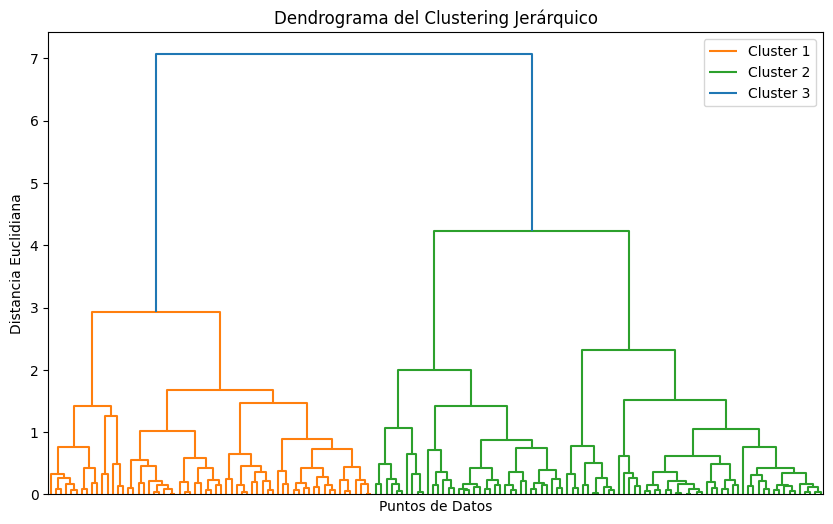

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_pca, method='complete', metric='euclidean')
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(10, 6))
dendrogram(linked,
			orientation='top',
			distance_sort='ascending',
			show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.xticks([])  # Remove x-axis labels -> Remove this line to see the labels
plt.legend(labels, loc='best')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


# DBSCAN

4. Aplique el algoritmo de clusterización DBSCAN a unos datos con forma de dos círculos concéntricos. Puede guiarse con el siguiente ejemplo.

[Plot Cluster Comparison](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

¿El algoritmo logra separar los dos clusters, interior y exterior?

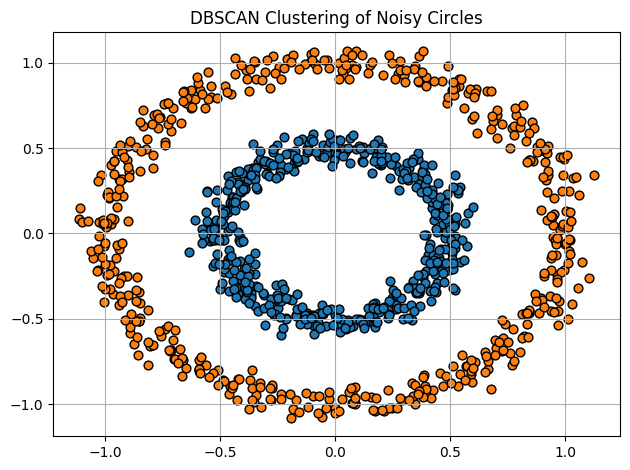

In [ ]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_moon, y_moon = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=0) # factor and noise set as the example
db = DBSCAN(eps=0.2, min_samples=5)
y_moon_db = db.fit_predict(X_moon)

plt.scatter(X[y_moon_db == 0, 0], X[y_moon_db == 0, 1], edgecolor='black', s=40, label='Cluster 1')
plt.scatter(X[y_moon_db == 1, 0], X[y_moon_db == 1, 1], edgecolor='black', s=40, label='Cluster 2')

plt.title('DBSCAN Clustering of Noisy Circles')
plt.tight_layout()
plt.grid()
plt.show()

Como se puede observar en el gráfico resultante, mediante los parámetros utilizados (todos los ya configurados en el ejemplo proporcionado y en los apuntes) el algoritmo consigue diferenciar correctamente los dos clústers de datos.

# Cuantización de color

5. El clustering se puede aplicar al procesamiento de imágenes sustituyendo cada valor de color por el centroide más cercano Si se utilizan muchos valores, la imagen procesada será una versión comprimida del original que retendrá mucha fidelidad. Si se reduce el número de clusters, la distorsión es más evidente a simple vista. En el caso extremo de considerar sólo dos valores, estaríamos codificando cada píxel con sólo un bit, que puede utilizarse para codificar por ejemplo blanco y negro, dos grises o dos colores.

A partir de este código, obtén cuatro versiones comprimidas de una imagen de su elección. Dos imágenes serán en grises y dos en color. En dos de ellas usa un número elevado de clusters y en la otra un número reducido. Puede utilizar código de los siguientes ejemplos.

[Plot Color Quantization](https://scikit-learn.org/1.5/auto_examples/cluster/plot_color_quantization.html)

[Turn Photos into Cartoons Using Python](https://towardsdatascience.com/turn-photos-into-cartoons-using-python-bb1a9f578a7e)



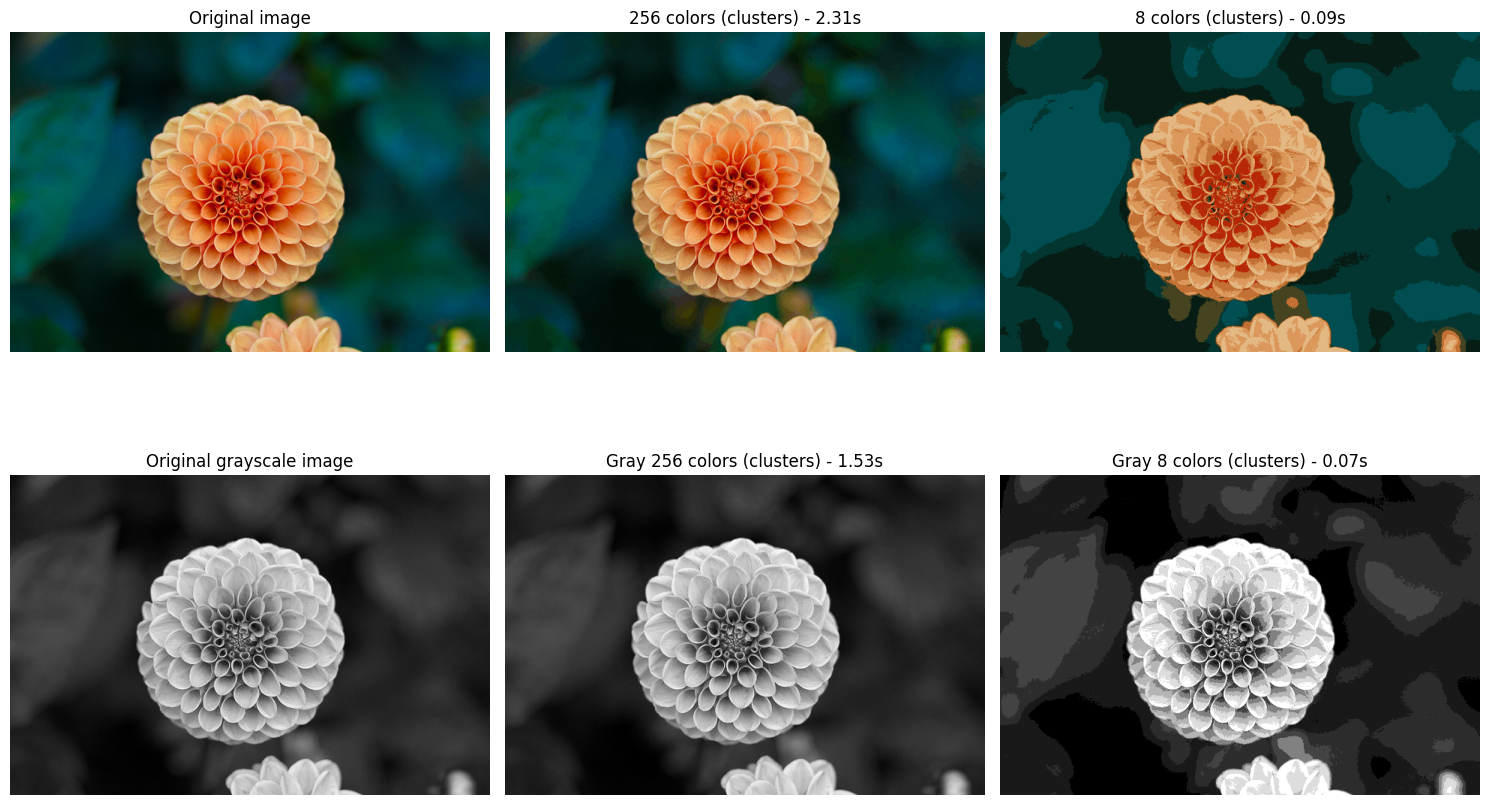

In [51]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

# Modidy these values to see the effect in the compressed images
LOW_CLUSTERS = 8
HIGH_CLUSTERS = 256

# From the documentation example
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

def clusterize_image(n_clusters, image_array):
	 kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array)
	 labels = kmeans.predict(image_array)
	 return kmeans, labels


# Just as the documentation example, but this time with the flower.jpg image
image = load_sample_image('flower.jpg') 
image = np.array(image, dtype=np.float64) / 255
image_shape = image.shape
width, height, depth = tuple(image_shape)
assert depth == 3 # Should return 3 float/int numbers representing wifth, height and depth
image_array = np.reshape(image, (width * height, depth))

# Convert image to grayscale
image_gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
image_array_gray = np.reshape(image_gray, (w * h, 1))

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title(f'Original image')
plt.imshow(image)

# Original Image with High number of clusters
t = time() # Start time to calculate the time it takes to compress the image
kmeans_high_color, labels_high_color = clusterize_image(HIGH_CLUSTERS, image_array)
plt.subplot(2, 3, 2)
plt.axis('off')
plt.title(f'{HIGH_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_high_color.cluster_centers_, labels_high_color, width, height))

# Original Image with Low number of clusters
t = time()
kmeans_low_color, labels_low_color = clusterize_image(LOW_CLUSTERS, image_array)
plt.subplot(2, 3, 3)
plt.axis('off')
plt.title(f'{LOW_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_low_color.cluster_centers_, labels_low_color, width, height))

# Grayscaled Image
plt.subplot(2, 3, 4)
plt.axis('off')
plt.title('Original grayscale image')
plt.imshow(image_gray, cmap='gray') # Gray scale????????????

# Grayscaled Image with High number of clusters
t = time()
kmeans_high_gray,	labels_high_gray = clusterize_image(HIGH_CLUSTERS, image_array_gray)
plt.subplot(2, 3, 5)
plt.axis('off')
plt.title(f'Gray {HIGH_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_high_gray.cluster_centers_, labels_high_gray, width, height), cmap='gray')

# Grayscaled Image with Low number of clusters
t = time()
kmeans_low_gray, labels_low_gray = clusterize_image(LOW_CLUSTERS, image_array_gray)
plt.subplot(2, 3, 6)
plt.axis('off')
plt.title(f'Gray {LOW_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_low_gray.cluster_centers_, labels_low_gray, width, height), cmap='gray')


plt.tight_layout()
plt.show()

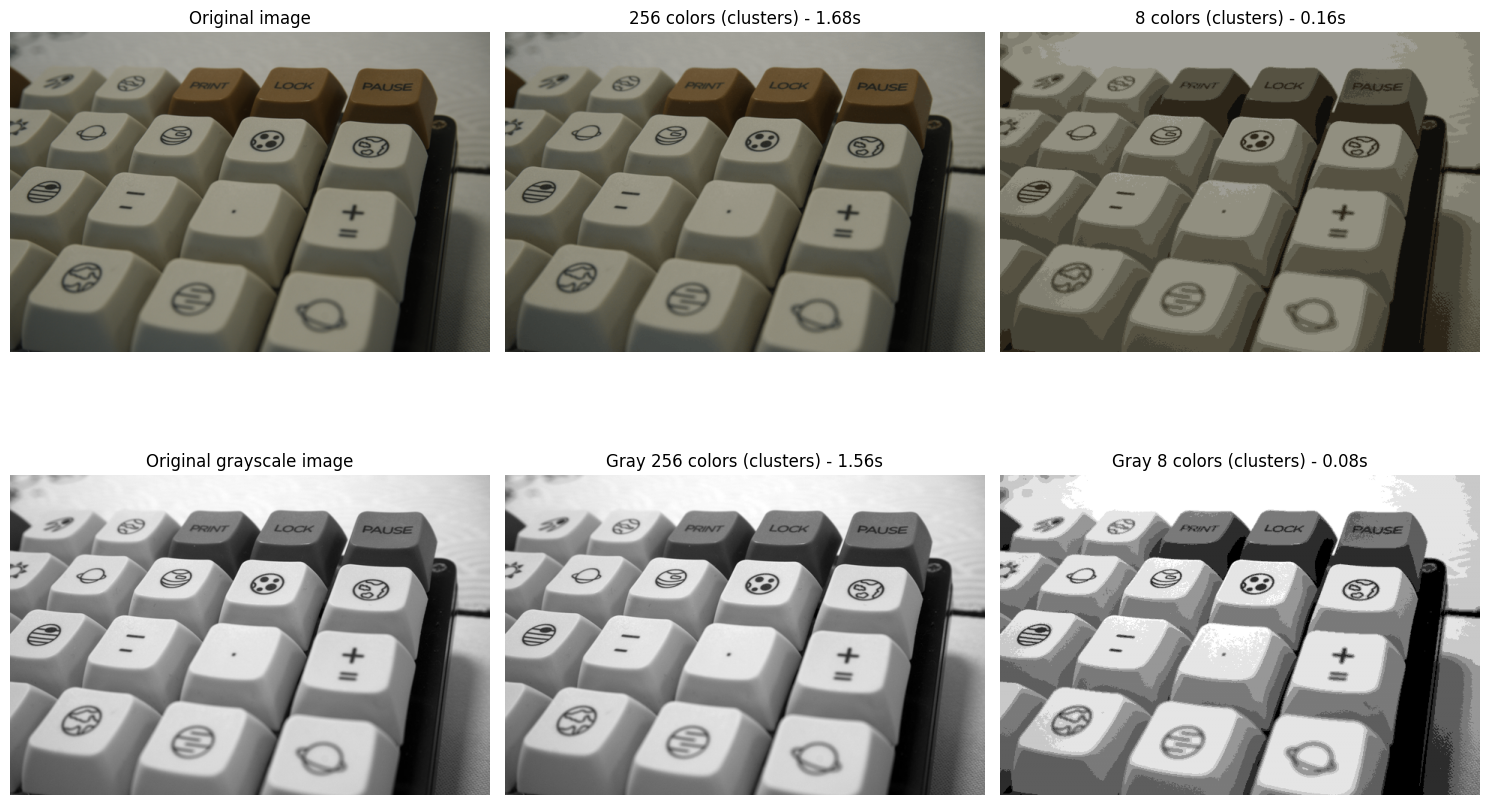

In [53]:
from PIL import Image
import requests
from io import BytesIO

# Thois metod requests the image from the URL and returns it as a numpy array
def get_image(url):
	response = requests.get(url)
	img = Image.open(BytesIO(response.content))
	img = np.array(img, dtype=np.float64) / 255
	return img

# Example usage:
IMAGE_URL = 'https://i.ibb.co/kQdQRRm/kb-mage-min.png' #! It needs to be a PNG image
custom_image = get_image(IMAGE_URL)

# Repeat the same proces as before
custom_image_shape = custom_image.shape
width, height, depth = tuple(custom_image_shape)
assert depth == 3 # Should return 3 float/int numbers representing wifth, height and depth
custom_image_array = np.reshape(custom_image, (width * height, depth))

# Convert image to grayscale
custom_image_gray = np.dot(custom_image[...,:3], [0.2989, 0.5870, 0.1140])
custom_image_array_gray = np.reshape(custom_image_gray, (w * h, 1))

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.axis('off')
plt.title(f'Original image')
plt.imshow(custom_image)

# Original Image with High number of clusters
t = time() # Start time to calculate the time it takes to compress the image
kmeans_high_color, labels_high_color = clusterize_image(HIGH_CLUSTERS, custom_image_array)
plt.subplot(2, 3, 2)
plt.axis('off')
plt.title(f'{HIGH_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_high_color.cluster_centers_, labels_high_color, width, height))

# Original Image with Low number of clusters
t = time()
kmeans_low_color, labels_low_color = clusterize_image(LOW_CLUSTERS, custom_image_array)
plt.subplot(2, 3, 3)
plt.axis('off')
plt.title(f'{LOW_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_low_color.cluster_centers_, labels_low_color, width, height))

# Grayscaled Image
plt.subplot(2, 3, 4)
plt.axis('off')
plt.title('Original grayscale image')
plt.imshow(custom_image_gray, cmap='gray') # Gray scale????????????

# Grayscaled Image with High number of clusters
t = time()
kmeans_high_gray,	labels_high_gray = clusterize_image(HIGH_CLUSTERS, custom_image_array_gray)
plt.subplot(2, 3, 5)
plt.axis('off')
plt.title(f'Gray {HIGH_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_high_gray.cluster_centers_, labels_high_gray, width, height), cmap='gray')

# Grayscaled Image with Low number of clusters
t = time()
kmeans_low_gray, labels_low_gray = clusterize_image(LOW_CLUSTERS, custom_image_array_gray)
plt.subplot(2, 3, 6)
plt.axis('off')
plt.title(f'Gray {LOW_CLUSTERS} colors (clusters) - {time() - t:.2f}s')
plt.imshow(recreate_image(kmeans_low_gray.cluster_centers_, labels_low_gray, width, height), cmap='gray')


plt.tight_layout()
plt.show()